In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

from mpl_toolkits.axes_grid1 import make_axes_locatable
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.neighbors import DistanceMetric
from math import radians

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn import svm
from sklearn import metrics


from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Utilisation du DF data_features qui contient toute les données nettoyées et le climat koppen intégré

df = pd.read_csv('data_features.csv', sep=',', index_col=0) 
df.head()

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,windspeed3pm,temp_amplitude,cloud3pm,rainfall,climat,...,cloud9am,winddir9am_sin,latitude,month,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
0,10.9,44.0,22.0,1007.1,2008,24.0,9.5,7.0,0.6,0,...,8.0,1.224647e-16,-36.065766,12,0,0,7.6,20.0,-1.000000,0
1,12.9,44.0,25.0,1007.8,2008,22.0,17.7,1.0,0.0,0,...,1.0,9.238795e-01,-36.065766,12,0,0,12.0,4.0,-0.923880,0
2,8.0,46.0,30.0,1008.7,2008,26.0,12.8,2.0,0.0,0,...,7.0,1.224647e-16,-36.065766,12,0,0,8.0,19.0,-0.923880,0
3,2.2,24.0,16.0,1012.8,2008,9.0,18.8,6.0,0.0,0,...,8.0,-7.071068e-01,-36.065766,12,0,0,10.0,11.0,0.707107,0
4,6.7,41.0,33.0,1006.0,2008,20.0,14.8,8.0,1.0,0,...,7.0,3.826834e-01,-36.065766,12,0,0,4.8,7.0,-1.000000,0


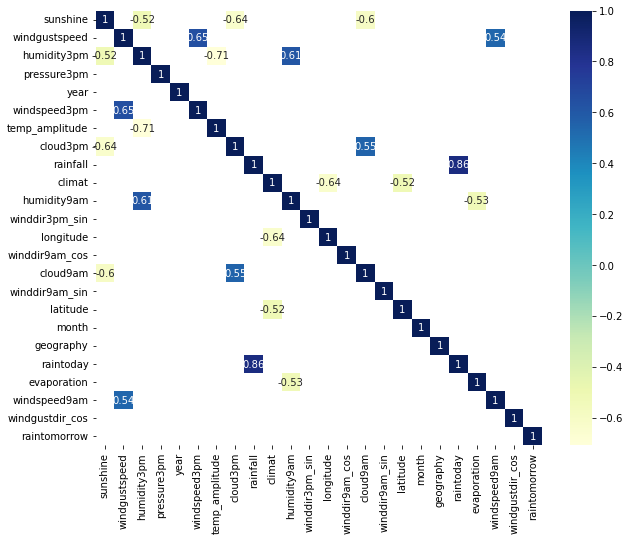

In [4]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Créer un masque pour masquer les corrélations inférieures à 0,75
mask = (corr_matrix < 0.5) & (corr_matrix > -0.5)

# Créer une nouvelle figure avec une taille de 10 x 8 pouces
plt.figure(figsize=(10, 8))

# Afficher la matrice de corrélation avec les valeurs de corrélation annotées et les valeurs de corrélation inférieures à 0,75 masquées
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='YlGnBu')

# Afficher le graphique
plt.show()

In [5]:
features = ["sunshine","humidity3pm","pressure3pm","windspeed3pm","temp_amplitude",
            "cloud3pm","rainfall","climat","winddir3pm_sin","cloud9am", "latitude", "geography", "raintoday", "evaporation", "windgustdir_cos"]

In [6]:
#On supprime toutes les observations avec des NA
df1 = df.dropna()

target = df1["raintomorrow"]
data = df1[features]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=123)

In [7]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [11:27:26<00:00, 1422.28s/it]  

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.74               0.74     0.74      0.77   
BernoulliNB                        0.79               0.70     0.70      0.81   
GaussianNB                         0.81               0.70     0.70      0.82   
XGBClassifier                      0.88               0.69     0.69      0.86   
LabelPropagation                   0.84               0.69     0.69      0.84   
QuadraticDiscriminantAnalysis      0.83               0.68     0.68      0.83   
LGBMClassifier                     0.88               0.68     0.68      0.86   
RandomForestClassifier             0.88               0.68     0.68      0.86   
DecisionTreeClassifier             0.82               0.67     0.67      0.82   
BaggingClassifier                  0.87               0.67     0.67      0.86   
LinearDiscriminantAnalysis  

In [10]:
from sklearn.metrics import balanced_accuracy_score
from lazypredict.Supervised import LazyClassifier

clf2 = LazyClassifier(ignore_warnings=True, custom_metric=balanced_accuracy_score)
models2, predictions = clf2.fit(X_train, X_test, y_train, y_test)
print(models2)

100%|██████████| 29/29 [30:33:03<00:00, 3792.52s/it]     

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.74               0.74     0.74      0.77   
BernoulliNB                        0.79               0.70     0.70      0.81   
GaussianNB                         0.81               0.70     0.70      0.82   
XGBClassifier                      0.88               0.69     0.69      0.86   
LabelPropagation                   0.84               0.69     0.69      0.84   
QuadraticDiscriminantAnalysis      0.83               0.68     0.68      0.83   
LGBMClassifier                     0.88               0.68     0.68      0.86   
RandomForestClassifier             0.88               0.68     0.68      0.86   
DecisionTreeClassifier             0.82               0.67     0.67      0.82   
BaggingClassifier                  0.87               0.67     0.67      0.86   
LinearDiscriminantAnalysis  

In [8]:
# Importer les bibliothèques nécessaires
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


# Définir les paramètres pour la recherche de grille
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.5, 0.8],
    'n_estimators': [100, 200]
}

# Créer un classificateur XGBClassifier
xgb = XGBClassifier()

# Créer un objet GridSearchCV
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Adapter le modèle avec GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score de validation croisée
print("Meilleurs paramètres:", grid_search.best_params_)
print("Score de validation croisée:", grid_search.best_score_)

# Faire des prédictions sur les données de test avec le meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluer les performances du modèle sur les données de test
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)


Meilleurs paramètres: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.5}
Score de validation croisée: 0.726171648367562
F1 Score: 0.7191847394123971


In [10]:
from xgboost import XGBClassifier

# Les meilleurs hyperparamètres trouvés lors de la recherche de grille
best_params = {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.5}

# Création d'une instance de XGBClassifier avec les meilleurs hyperparamètres
xgb = XGBClassifier(**best_params)

# Entraînement du modèle
xgb.fit(X_train, y_train)

# Prédictions sur le jeu de données de test
y_pred = xgb.predict(X_test)

# Calcul du score F1
f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)


F1 score:  0.5084091535704439


In [11]:
import numpy as np
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Création d'une instance du modèle
lgbm = LGBMClassifier()

# Définition de la grille de recherche
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Définition du score à optimiser (le score F1 dans ce cas)
scoring = make_scorer(f1_score)

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(
    lgbm, 
    param_grid=param_grid, 
    scoring=scoring,
    cv=5,
    n_jobs=-1
)

# Entraînement de l'objet GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du score F1 correspondant
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)
print("Score F1 correspondant :")
print(np.round(grid_search.best_score_, 4))


Meilleurs hyperparamètres :
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.6}
Score F1 correspondant :
0.5369


In [13]:
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier

# Création d'une instance du modèle avec les meilleurs hyperparamètres
lgbm_best = LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=1000, subsample=0.6)

# Entraînement du modèle sur l'ensemble des données d'entraînement
lgbm_best.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = lgbm_best.predict(X_test)

# Calcul du score F1 sur l'ensemble de test
f1 = f1_score(y_test, y_pred)

# Affichage du score F1
print("Score F1 : {:.4f}".format(f1))

Score F1 : 0.5269


In [14]:
import numpy as np
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Création d'une instance du modèle
rfc = RandomForestClassifier()

# Définition de la grille de recherche
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 9, None],
    'max_features': ['sqrt', 'log2', None]
}

# Définition du score à optimiser (le score F1 dans ce cas)
scoring = make_scorer(f1_score)

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(
    rfc, 
    param_grid=param_grid, 
    scoring=scoring,
    cv=5,
    n_jobs=-1
)

# Entraînement de l'objet GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du score F1 correspondant
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)
print("Score F1 correspondant :")
print(np.round(grid_search.best_score_, 4))

Meilleurs hyperparamètres :
{'max_depth': None, 'max_features': None, 'n_estimators': 1000}
Score F1 correspondant :
0.5223


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Instanciation du modèle avec les meilleurs hyperparamètres trouvés
rfc = RandomForestClassifier(max_depth=None, max_features=None, n_estimators=1000)

# Entraînement du modèle sur les données d'entraînement
rfc.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = rfc.predict(X_test)

# Calcul du F1 score sur l'ensemble de test
f1 = f1_score(y_test, y_pred)

# Affichage du F1 score
print("F1 score sur l'ensemble de test : {:.4f}".format(f1))

F1 score sur l'ensemble de test : 0.5158


In [ ]:
import numpy as np
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

# Création d'une instance du modèle
etc = ExtraTreesClassifier()

# Définition de la grille de recherche
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 9, None],
    'max_features': ['sqrt', 'log2', None]
}

# Définition du score à optimiser (le score F1 dans ce cas)
scoring = make_scorer(f1_score)

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(
    etc, 
    param_grid=param_grid, 
    scoring=scoring,
    cv=5,
    n_jobs=-1
)

# Entraînement de l'objet GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du score F1 correspondant
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)
print("Score F1 correspondant :")
print(np.round(grid_search.best_score_, 4))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score

# Instanciation du modèle avec les meilleurs hyperparamètres trouvés
etc = ExtraTreesClassifier(n_estimators=500, max_depth=15, max_features='sqrt', min_samples_leaf=2)

# Entraînement du modèle sur les données d'entraînement
etc.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = etc.predict(X_test)

# Calcul du F1 score sur l'ensemble de test
f1 = f1_score(y_test, y_pred)

# Affichage du F1 score
print("F1 score sur l'ensemble de test : {:.4f}".format(f1))